<center>
<img src="https://wpsovet.ru/wp-content/uploads/1/6/4/1642a836ada1355f35ef577d9024a728.jpg" width="700"> 

# Андан на экономе: домашнее задание 2
</center>

**ФИО:** Берлизова Дарья Евгеньевна

**id из контеста:** dap_econ_2022_41, сдавала с Дарья Берлизова

**Внимание, конкурс!** 

Напиши свой любимый анекдот. Аcсисты и семенаристы устроют голосование. Лучшая тройка получит по бонусному баллу.

**Место для аника:** Мама собирает сыну обед в школу:

— Вот, положила тебе в рюкзак хлеб, колбасу и гвозди.

— Мам, но зачем?

— То есть как это, зачем? Проголодаешься ― возьмешь колбасу, хлеб, сделаешь себе бутерброд и поешь. Это твой обед.

— Мам, а гвозди?

— Ну, так вот же они!

## Общая информация


__Дата выдачи:__ 06.03.2023

__Мягкий дедлайн:__ 23:59MSK 02.04.2022

__Жесткий дедлайн:__ 23:59MSK 09.04.2022

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-NUM-USERNAME.ipynb, где NUM — номер из вашего логина, а USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

Если хотите, можете разбить тетрадку на несколько разных для своего удобства.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Часть 1: рисковая 

В этом задании мы немного поработаем с ценами на акции. За задание можно получить $50$ баллов.

В табличке `prices.tsv` лежат данные о том, как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по ценным бумагам. Подгрузим эти таблицы и посмотрим на них. 

In [2]:
df_prices = pd.read_csv('data/price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


Date          A        AAL        AAP       AAPL       ABBV  \
0  2013-03-05 00:00:00  27.946215  13.245518  71.640678  13.298839  24.972109   
1  2013-03-06 00:00:00  28.326160  13.735741  70.923820  13.129805  25.125229   
2  2013-03-07 00:00:00  28.332716  13.971428  70.961044  13.281566  24.958796   
3  2013-03-08 00:00:00  28.188597  14.065701  71.538284  13.316731  24.858923   
4  2013-03-11 00:00:00  28.044483  14.263680  72.180695  13.506428  25.078619   

         ABC  ABNB        ABT       ACGL  ...        XOM       XRAY  \
0  41.335518   NaN  28.678448  16.563334  ...  58.596577  39.023003   
1  41.515339   NaN  28.347576  16.583332  ...  58.563908  39.283100   
2  41.172813   NaN  28.479918  16.813334  ...  58.008087  39.515335   
3  41.515339   NaN  28.686729  16.879999  ...  58.178085  39.701115   
4  41.575287   NaN  28.893517  16.940001  ...  58.302341  39.812572   

         XYL        YUM        ZBH       ZBRA       ZION  ZM  ZS        ZTS  
0  24.914204  39.376095  67.826096  44.869999  20.423979 NaN NaN  31.940346  
1  25.693598  39.738384  67.343094  44.790001  20.907482 NaN NaN  31.530493  
2  24.870417  39.940308  66.985306  44.619999  21.057535 NaN NaN  32.191845  
3  24.896696  40.219440  67.441467  45.040001  21.090885 NaN NaN  31.754053  
4  25.185684  40.290707  67.745613  45.470001  21.365984 NaN NaN  31.837889  

[5 rows x 521 columns]

In [3]:
df_inf = pd.read_csv('data/information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


Symbol                  Security SEC filings             GICS Sector  \
0      A  Agilent Technologies Inc     reports             Health Care   
1    AAL   American Airlines Group     reports             Industrials   
2    AAP        Advance Auto Parts     reports  Consumer Discretionary   
3   AAPL                Apple Inc.     reports  Information Technology   
4   ABBV               AbbVie Inc.     reports             Health Care   

                            GICS Sub Industry    Headquarters Location  \
0                       Health Care Equipment  Santa Clara, California   
1                                    Airlines        Fort Worth, Texas   
2                           Automotive Retail  Raleigh, North Carolina   
3  Technology Hardware, Storage & Peripherals    Cupertino, California   
4                             Pharmaceuticals  North Chicago, Illinois   

  Date first added        CIK  Founded  S&P-500  NASDAQ    DJI  
0         05.06.00  1090872.0   1999.0     True   False  False  
1         23.03.15     6201.0   1934.0     True   False  False  
2         09.07.15  1158449.0   1932.0     True   False  False  
3         30.11.82   320193.0   1977.0     True    True   True  
4         31.12.12  1551152.0   1888.0     True   False  False

## 1.1 Разогреваемся

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [4]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices = df_prices.set_index('Date')
df_prices.head()
# df_prices.info()

A        AAL        AAP       AAPL       ABBV        ABC  \
Date                                                                           
2013-03-05  27.946215  13.245518  71.640678  13.298839  24.972109  41.335518   
2013-03-06  28.326160  13.735741  70.923820  13.129805  25.125229  41.515339   
2013-03-07  28.332716  13.971428  70.961044  13.281566  24.958796  41.172813   
2013-03-08  28.188597  14.065701  71.538284  13.316731  24.858923  41.515339   
2013-03-11  28.044483  14.263680  72.180695  13.506428  25.078619  41.575287   

            ABNB        ABT       ACGL        ACN  ...        XOM       XRAY  \
Date                                               ...                         
2013-03-05   NaN  28.678448  16.563334  63.810726  ...  58.596577  39.023003   
2013-03-06   NaN  28.347576  16.583332  64.217216  ...  58.563908  39.283100   
2013-03-07   NaN  28.479918  16.813334  64.349945  ...  58.008087  39.515335   
2013-03-08   NaN  28.686729  16.879999  64.997017  ...  58.178085  39.701115   
2013-03-11   NaN  28.893517  16.940001  64.955536  ...  58.302341  39.812572   

                  XYL        YUM        ZBH       ZBRA       ZION  ZM  ZS  \
Date                                                                        
2013-03-05  24.914204  39.376095  67.826096  44.869999  20.423979 NaN NaN   
2013-03-06  25.693598  39.738384  67.343094  44.790001  20.907482 NaN NaN   
2013-03-07  24.870417  39.940308  66.985306  44.619999  21.057535 NaN NaN   
2013-03-08  24.896696  40.219440  67.441467  45.040001  21.090885 NaN NaN   
2013-03-11  25.185684  40.290707  67.745613  45.470001  21.365984 NaN NaN   

                  ZTS  
Date                   
2013-03-05  31.940346  
2013-03-06  31.530493  
2013-03-07  32.191845  
2013-03-08  31.754053  
2013-03-11  31.837889  

[5 rows x 520 columns]

__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [5]:
len(df_inf[df_inf['NASDAQ']== True])

103

Сколько ценных бумаг входят во все три индекса сразу?

In [6]:
len(df_inf[(df_inf['NASDAQ']== True) & (df_inf['S&P-500']== True) & (df_inf['DJI']== True)])

5

В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [7]:
len(df_inf[(df_inf['S&P-500']== True) & (df_inf['Founded'] < 1900)])

97

В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [8]:
df_inf['GICS Sector'].nunique()

11

Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [9]:
tiket_in_prices = df_prices.columns.values.tolist()
tiket_in_inf = df_inf['Symbol'].tolist()
print(len(list((set(tiket_in_prices) | set(tiket_in_inf)) - set(tiket_in_inf) )))

58


In [10]:
# a = [1,2,3,4,5,8,10]
# b = [1,4,8,10,11,12,22]
# c = list((set(a) | set(b)) - set(b) )
# print(c)

__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

In [11]:
biggest_sectors = df_inf['GICS Sector'].value_counts()[:3].keys()
count_company = df_inf[(df_inf['GICS Sector'].isin(biggest_sectors)) & (df_inf['S&P-500']== True)]
print(len(count_company))

210


__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

__Ответ:__ Распределение стоимости акций похоже на нормальное только для BMY и SYF, и то отдаленно. В течение последних 10 лет финансовые рынки колебались. В среднем финансовые рынки росли за последние 10 лет, но можно заметить, что в 2020 по всем ценам на акции было падение, вероятнее всего связанное с ковидным кризисом, его можно отследить на графике с динамикой цен.

array([<AxesSubplot:xlabel='Год', ylabel='Цена'>,
       <AxesSubplot:xlabel='Год', ylabel='Цена'>,
       <AxesSubplot:xlabel='Год', ylabel='Цена'>,
       <AxesSubplot:xlabel='Год', ylabel='Цена'>,
       <AxesSubplot:xlabel='Год', ylabel='Цена'>], dtype=object)

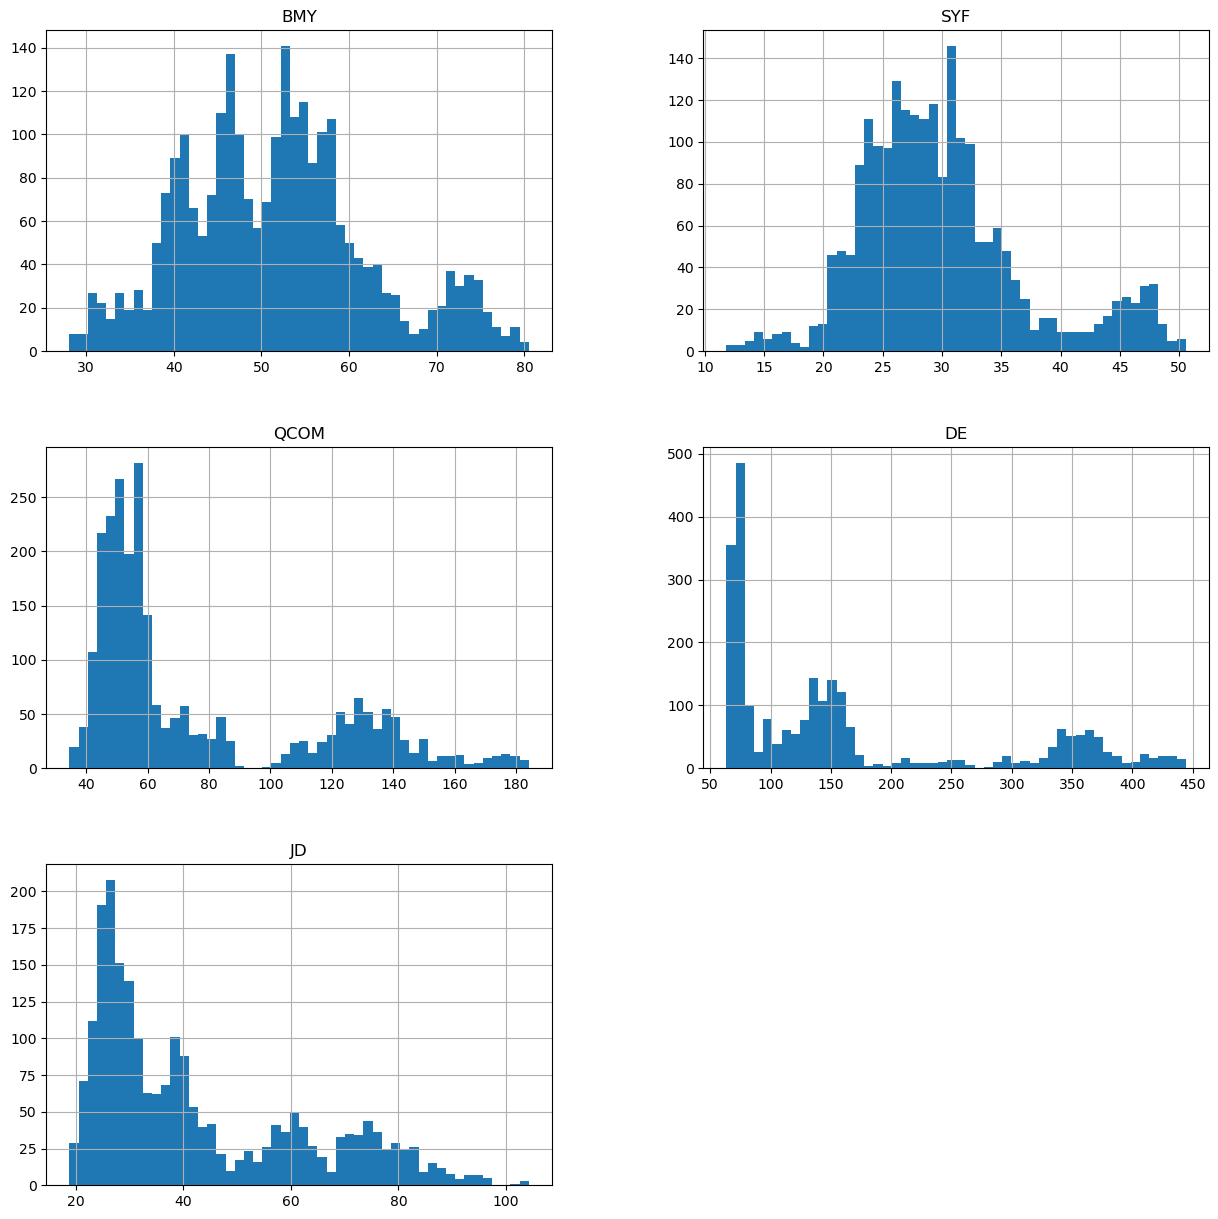

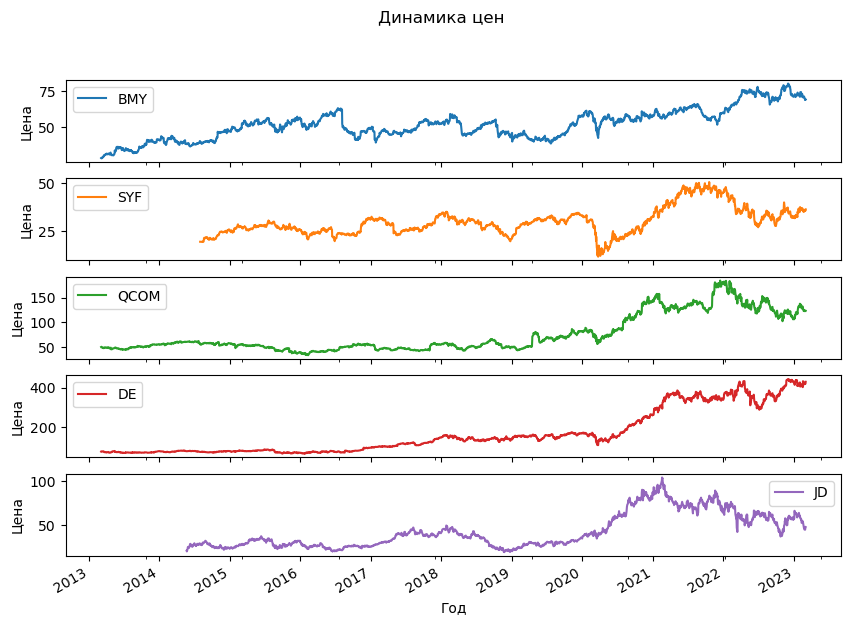

In [12]:
import random as rd
rd.seed(1)

random_tikets = rd.choices(tiket_in_prices, k=5)

df_prices[random_tikets].hist(figsize=(15, 15), bins = 50);

df_prices[random_tikets].plot(figsize=(10, 7), xlabel = 'Год', ylabel = 'Цена', subplots = True, title = 'Динамика цен')



__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [13]:
# your code here
# (￢_￢) 

## 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [14]:
# your code here
# (⊙_⊙)

df_r = df_prices.diff()/ df_prices.shift(1)
df_r = df_r.drop(['2013-03-05'], axis =0)
df_r

A       AAL       AAP      AAPL      ABBV       ABC  \
Date                                                                     
2013-03-06  0.013596  0.037010 -0.010006 -0.012710  0.006132  0.004350   
2013-03-07  0.000231  0.017159  0.000525  0.011559 -0.006624 -0.008251   
2013-03-08 -0.005087  0.006748  0.008135  0.002648 -0.004001  0.008319   
2013-03-11 -0.005112  0.014075  0.008980  0.014245  0.008838  0.001444   
2013-03-12 -0.004439  0.024455 -0.002193 -0.021559 -0.013273  0.002060   
...              ...       ...       ...       ...       ...       ...   
2023-02-27  0.006940  0.004499  0.012820  0.008248  0.010281 -0.012234   
2023-02-28 -0.001477  0.022393  0.030790 -0.003448 -0.002463 -0.006831   
2023-03-01 -0.031415  0.003129 -0.042357 -0.014246  0.008902  0.006107   
2023-03-02  0.030252  0.005614  0.002809  0.004129 -0.005732 -0.010287   
2023-03-03  0.015953  0.014888 -0.005244  0.035090  0.010882  0.008070   

                ABNB       ABT      ACGL       ACN  ...       XOM      XRAY  \
Date                                                ...                       
2013-03-06       NaN -0.011537  0.001207  0.006370  ... -0.000558  0.006665   
2013-03-07       NaN  0.004669  0.013869  0.002067  ... -0.009491  0.005912   
2013-03-08       NaN  0.007262  0.003965  0.010056  ...  0.002931  0.004701   
2013-03-11       NaN  0.007208  0.003555 -0.000638  ...  0.002136  0.002807   
2013-03-12       NaN  0.001432 -0.000197 -0.003576  ...  0.000000 -0.002567   
...              ...       ...       ...       ...  ...       ...       ...   
2023-02-27  0.006108 -0.006868  0.000578 -0.001051  ... -0.001806  0.006408   
2023-02-28 -0.002024  0.019545  0.011415 -0.002629  ... -0.005789  0.101881   
2023-03-01 -0.019873 -0.008750  0.013857 -0.007381  ...  0.008916 -0.018650   
2023-03-02  0.012828  0.017852 -0.000986  0.006336  ...  0.004599  0.008565   
2023-03-03  0.027374  0.017734  0.005642  0.014853  ...  0.012657  0.028132   

                 XYL       YUM       ZBH      ZBRA      ZION        ZM  \
Date                                                                     
2013-03-06  0.031283  0.009201 -0.007121 -0.001783  0.023673       NaN   
2013-03-07 -0.032038  0.005081 -0.005313 -0.003796  0.007177       NaN   
2013-03-08  0.001057  0.006989  0.006810  0.009413  0.001584       NaN   
2013-03-11  0.011607  0.001772  0.004510  0.009547  0.013043       NaN   
2013-03-12 -0.007998  0.013119  0.006073  0.001100 -0.006243       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-02-27  0.001465 -0.002050  0.004890  0.014764  0.002387 -0.002841   
2023-02-28  0.000975  0.004661  0.004623  0.013570  0.004564  0.011801   
2023-03-01 -0.015197 -0.007550 -0.014451  0.006961 -0.003556 -0.066631   
2023-03-02  0.011475  0.019651  0.007454  0.012304 -0.042228  0.014507   
2023-03-03  0.016333  0.007694  0.026262  0.011076  0.019044  0.002548   

                  ZS       ZTS  
Date                            
2013-03-06       NaN -0.012832  
2013-03-07       NaN  0.020975  
2013-03-08       NaN -0.013599  
2013-03-11       NaN  0.002640  
2013-03-12       NaN -0.010533  
...              ...       ...  
2023-02-27  0.007335 -0.005170  
2023-02-28 -0.005234  0.009246  
2023-03-01 -0.020663  0.003413  
2023-03-02  0.044301  0.006027  
2023-03-03 -0.111012  0.011745  

[2517 rows x 520 columns]

Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

__Ответ:__ По всем графикам видно, что доходности имеют практически стандартное нормальное распределение. Я впервые в жизни работаю с такой штукой, как ящик с усами, но вроде бы на нем видно много выбросов в данных и отклонений от средних значений по всем тикерам...

<AxesSubplot:title={'center':'Ящик с усами'}>

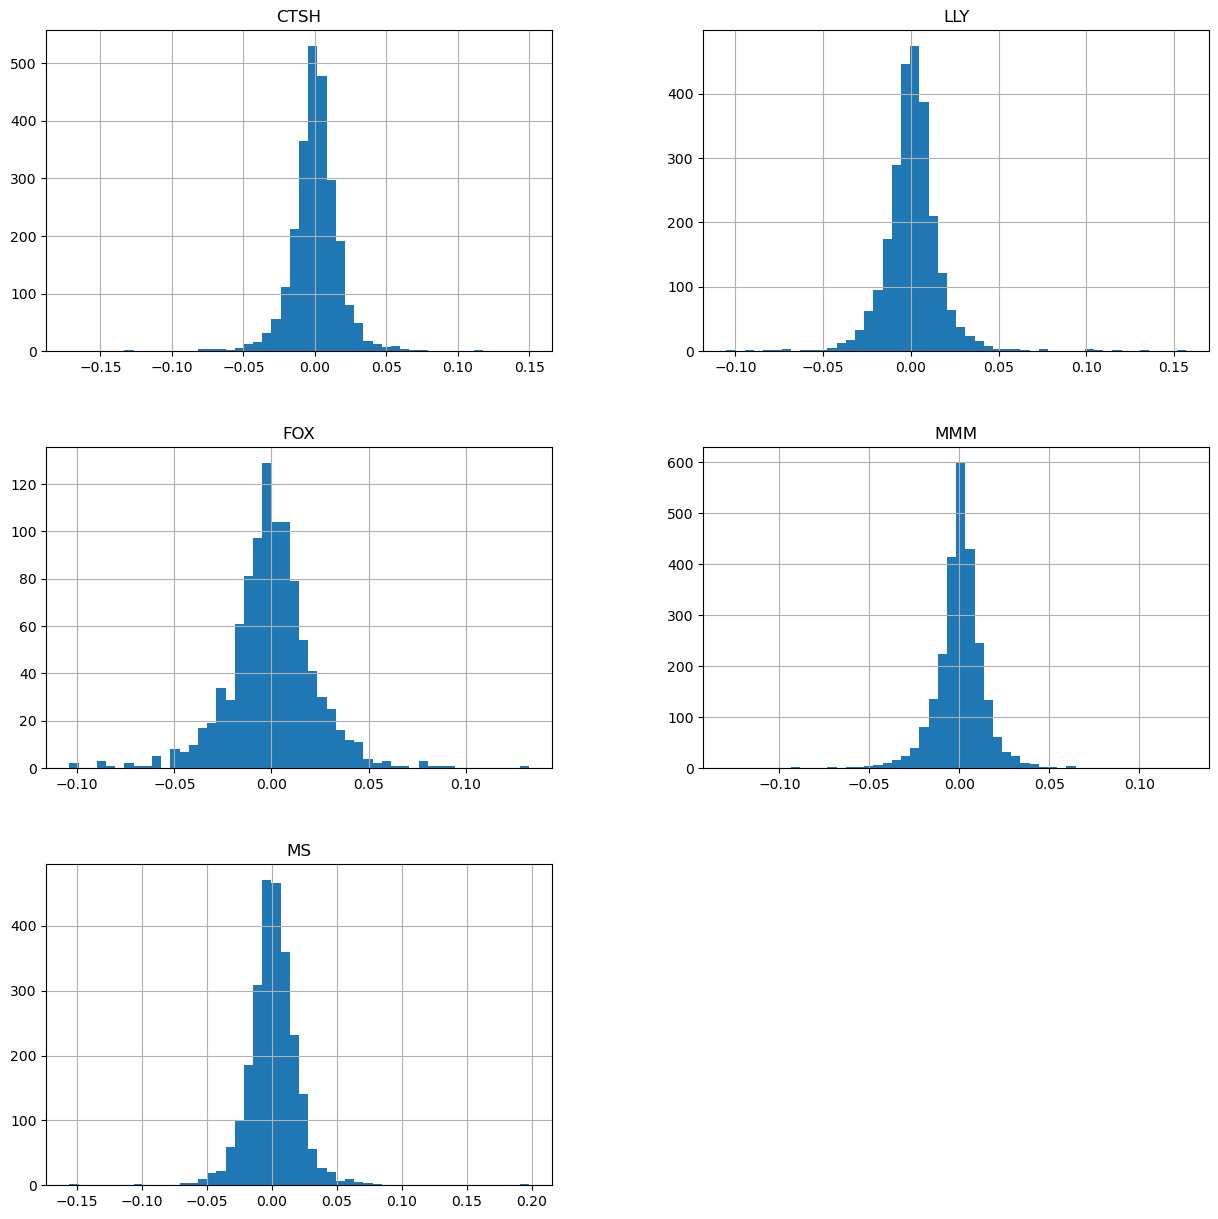

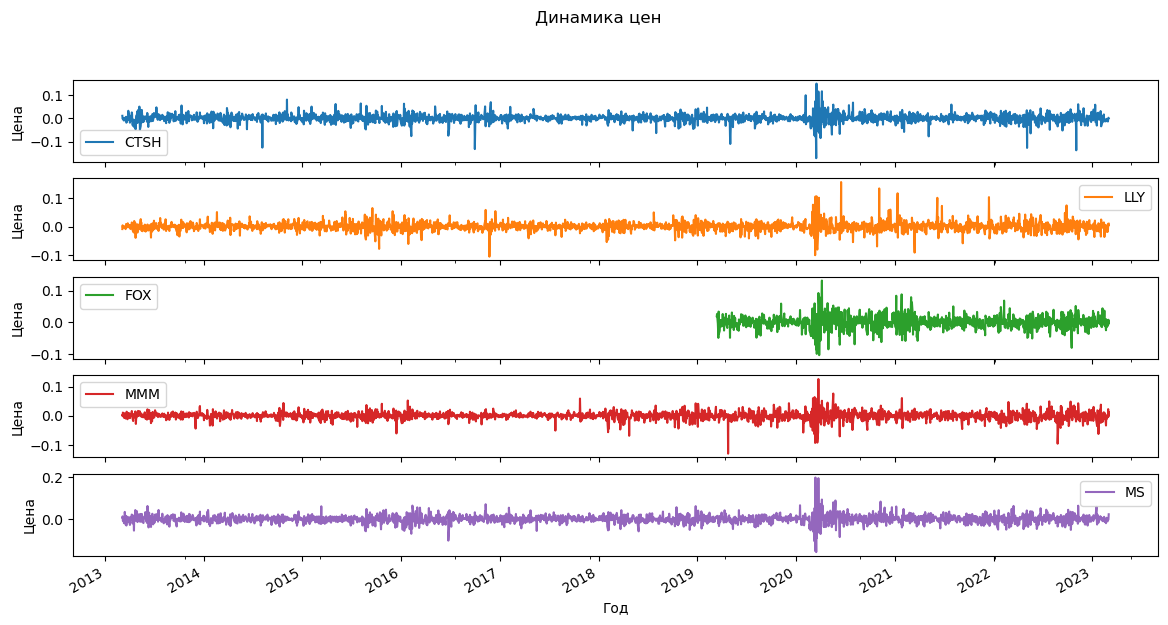

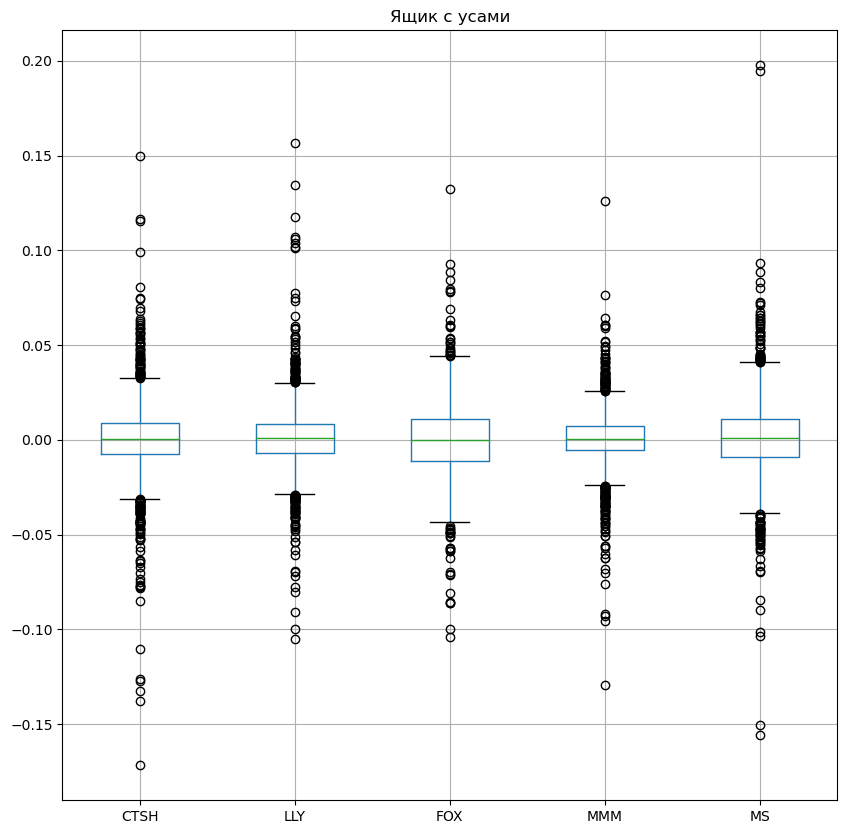

In [15]:
import random as rd
rd.seed(3)

random_tikets2 = rd.choices(tiket_in_prices, k=5)

df_r[random_tikets2].hist(figsize=(15, 15), bins = 50);

df_r[random_tikets2].plot(figsize=(14, 7), xlabel = 'Год', ylabel = 'Цена', title = 'Динамика цен', subplots = True)
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
plt.title('Ящик с усами')

df_r[random_tikets2].boxplot(figsize=(15, 17))

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

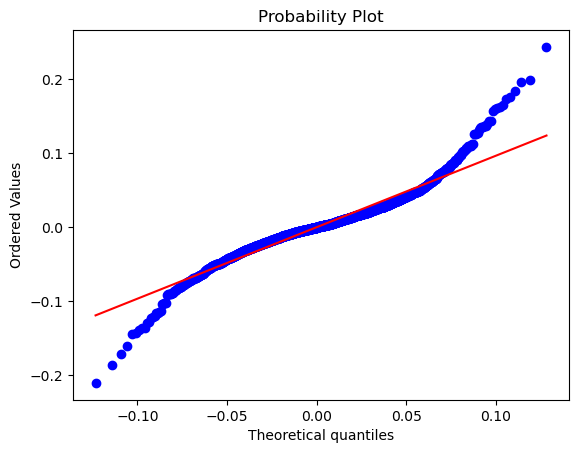

In [16]:
ax = plt.subplot(111)
x = df_r['TSLA'].values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [17]:
df_train = df_r[df_r.index  < '2022-03-03']
df_test = df_r[df_r.index  >= '2022-03-03']

__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [18]:
# your code here
# C (・_・)ノ

R = df_train.mean()
print(f"Самые доходные компании\n{R.sort_values(ascending=False).head(10)}\n")
if 'TSLA' in R.sort_values(ascending=False).head(10):
    print('Тесла есть среди доходных)\n')
else:
    print('Теслы нет среди доходных(\n')
print(f"Самые убыточные компании\n{R.sort_values().head(10)}")

Самые доходные компании
CEG     0.006477
LCID    0.004682
MRNA    0.003882
GFS     0.003782
DDOG    0.003149
CARR    0.003140
ENPH    0.002918
ZS      0.002762
TSLA    0.002746
CRWD    0.002606
dtype: float64

Тесла есть среди доходных)

Самые убыточные компании
RIVN   -0.005722
VTRS   -0.000168
KHC    -0.000037
GE      0.000021
IBM     0.000060
LUMN    0.000060
KMI     0.000071
SLB     0.000087
BEN     0.000105
WBD     0.000149
dtype: float64


Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

In [19]:
# your code here
# ٩(ˊ〇ˋ*)و

STD = df_train.std()
print(f"Самые рисковые компании\n{STD.sort_values(ascending=False).head(10)}\n")
if 'TSLA' in STD.sort_values(ascending=False).head(10):
    print('Тесла есть среди рисковых!\n')
else:
    print('Теслы нет среди рисковых!\n')
print(f"Самые безрисковые компании\n{STD.sort_values().head(10)}")

Самые рисковые компании
RIVN    0.072406
LCID    0.066841
ENPH    0.052601
MRNA    0.052030
PDD     0.045639
ZM      0.042788
GFS     0.041315
SEDG    0.040310
CRWD    0.039878
DDOG    0.039034
dtype: float64

Теслы нет среди рисковых!

Самые безрисковые компании
VZ      0.011099
JNJ     0.011255
KO      0.011309
PG      0.011339
RSG     0.011408
WM      0.011432
PEP     0.011443
CL      0.011778
MMC     0.012117
COST    0.012303
dtype: float64


Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [20]:

df_result = pd.DataFrame({'Ticker' : df_train.columns, 'std' : STD.values, 'r' : R.values} )
df_result = df_result.set_index('Ticker') # для удобства
df_result

std         r
Ticker                    
A       0.015556  0.000808
AAL     0.031476  0.000579
AAP     0.020050  0.000659
AAPL    0.017579  0.001268
ABBV    0.017331  0.000925
...          ...       ...
ZBRA    0.023282  0.001256
ZION    0.020683  0.000733
ZM      0.042788  0.001823
ZS      0.037999  0.002762
ZTS     0.015534  0.000919

[520 rows x 2 columns]

Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

__Ответ:__ Тесла - оранжевая точка на диаграмме. Смотря насколько примерно мы смотрим доходность, но есть 2 компании, у одной из которых она чуть поменьше, у другой чуть побольше, но риск точно меньше. Но в основном, компании с большей доходностью, чем у Теслы, и более рисковые.

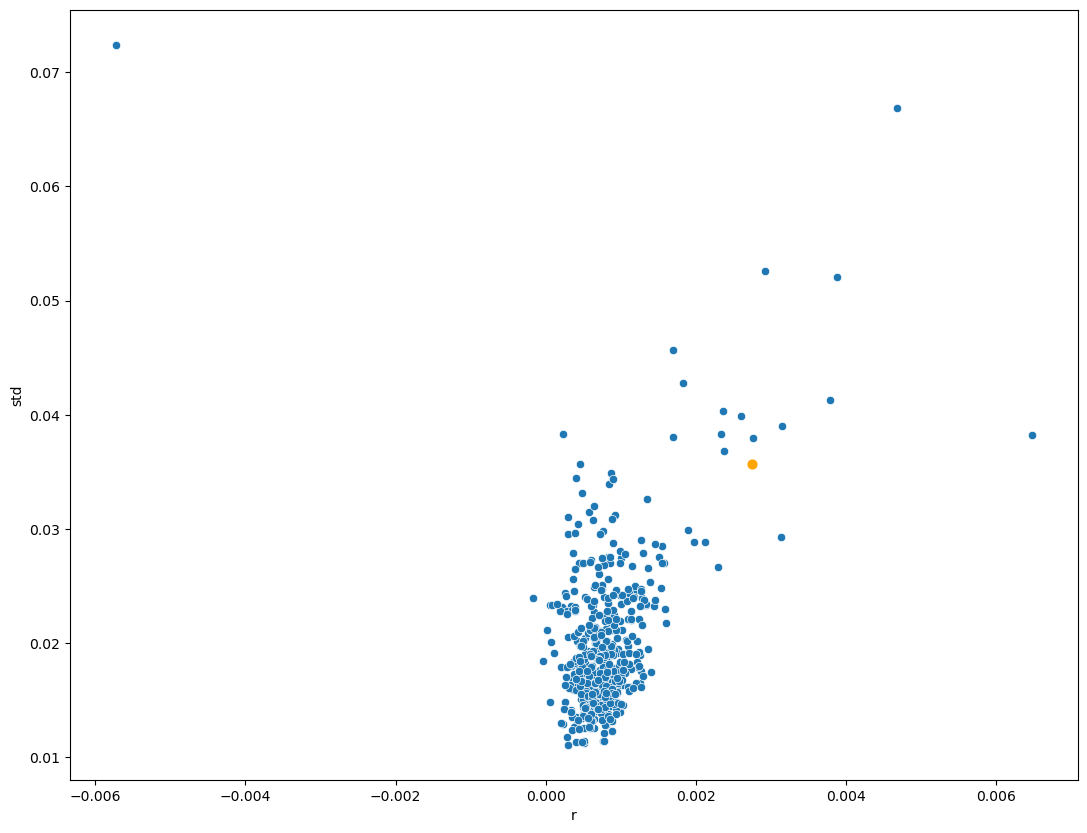

In [21]:
plt.figure(figsize=(13, 10))
sns.scatterplot(data=df_result, x="r", y="std", )
plt.scatter(df_result.loc[['TSLA'],['r']], df_result.loc[['TSLA'],['std']], color='orange', s=40)

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [22]:
# your code here
# ｀、ヽ｀ヽ｀、ヽ(ノ＞＜)ノ ｀、ヽ｀☂ヽ｀、ヽ0.023322365299465787

VaR = df_train.quantile(0.05) * (-1)


In [23]:
# добавим получившиеся значения в нашу таблицу
VaR.name = 'VaR'
df_result = df_result.join(VaR)
df_result.head()

std         r       VaR
Ticker                              
A       0.015556  0.000808  0.025164
AAL     0.031476  0.000579  0.044087
AAP     0.020050  0.000659  0.026499
AAPL    0.017579  0.001268  0.025629
ABBV    0.017331  0.000925  0.024926

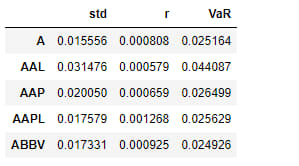

Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

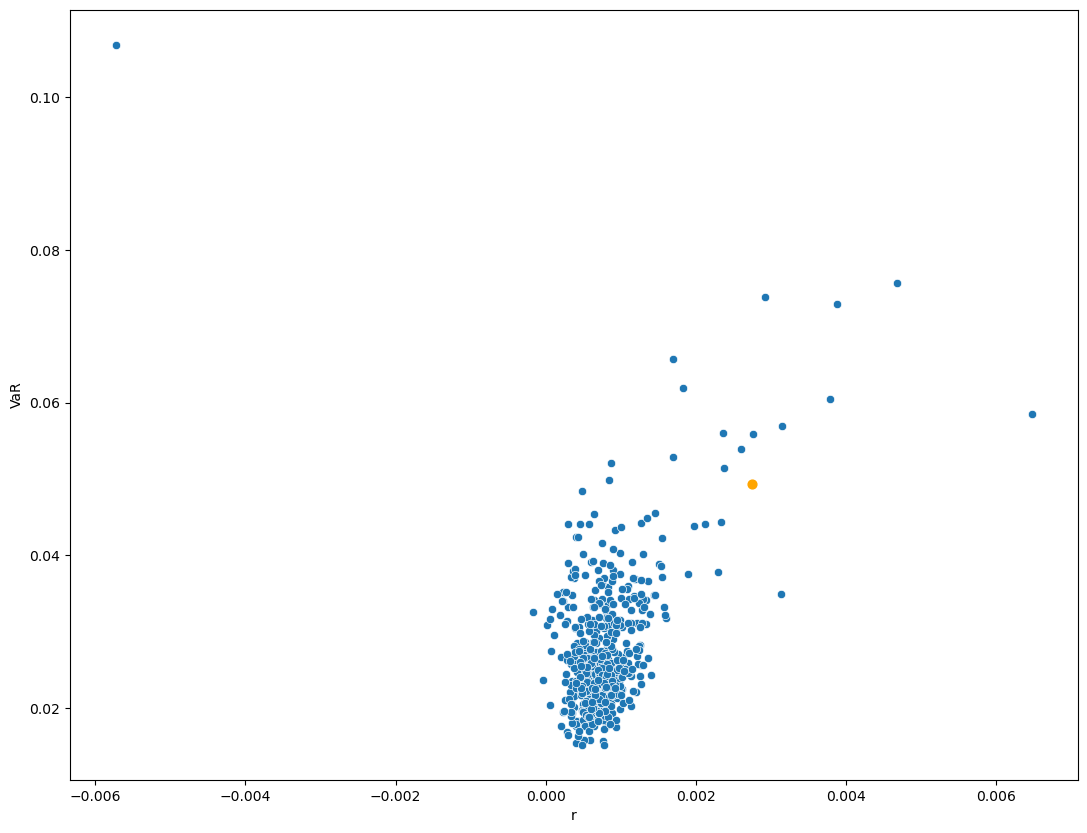

In [24]:
plt.figure(figsize=(13, 10))
sns.scatterplot(data=df_result, x="r", y="VaR", )
plt.scatter(df_result.loc[['TSLA'],['r']], df_result.loc[['TSLA'],['VaR']], color='orange', s=40)

$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [25]:
ES = df_train[df_train <= df_train.quantile(0.05)].mean()
ES *= -1
ES

A       0.036676
AAL     0.067565
AAP     0.043459
AAPL    0.039872
ABBV    0.040371
          ...   
ZBRA    0.052334
ZION    0.046021
ZM      0.088902
ZS      0.082118
ZTS     0.034426
Length: 520, dtype: float64

Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [26]:
ES.name = 'ES'
df_result = df_result.join(ES)
df_result.head()


std         r       VaR        ES
Ticker                                        
A       0.015556  0.000808  0.025164  0.036676
AAL     0.031476  0.000579  0.044087  0.067565
AAP     0.020050  0.000659  0.026499  0.043459
AAPL    0.017579  0.001268  0.025629  0.039872
ABBV    0.017331  0.000925  0.024926  0.040371

In [27]:
df_result = df_result.round(3)
df_result = df_result.sort_values(by='ES', ascending=False)
df_result

std      r    VaR     ES
Ticker                            
RIVN    0.072 -0.006  0.107  0.138
LCID    0.067  0.005  0.076  0.125
ENPH    0.053  0.003  0.074  0.105
MRNA    0.052  0.004  0.073  0.104
PDD     0.046  0.002  0.066  0.092
...       ...    ...    ...    ...
RSG     0.011  0.001  0.016  0.026
WM      0.011  0.001  0.015  0.026
PG      0.011  0.000  0.015  0.026
PEP     0.011  0.001  0.016  0.025
VZ      0.011  0.000  0.016  0.025

[520 rows x 4 columns]

In [28]:
df_result.to_csv('var_result.csv', sep=',')

1. Округлите данные до 3-х знаков после запятой `df_result.round(3)`
2. Отсортируйте таблицу `df_result` по колонке `ES` по убыванию
3. Запишите получившиеся результаты в таблицу с колонками `'Ticker', 'std', 'r', 'VaR', 'ES'` в файл `var_result` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми. Порядок колонок должен быть именно таким.
4. Отправьте свой файл `var_result.csv` в контест (https://contest.yandex.ru/contest/47242/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

Дарья Берлизова, ID: 84898747, URL: https://contest.yandex.ru/contest/47242/run-report/84898747/

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая 

__з) [10 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [29]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

На тестовой выборке мы пробили для Теслы VaR в 14% случаев вместо 5%. Это очень плохой результат. Наша оценка риска оказалась провальной. Можно с помощью теста Купика проверить значимость этих отличий, но мы пока что не будем это делать. Отложим эту историю до домашки про гипотезы.

Нарисуем VaR-кривую.

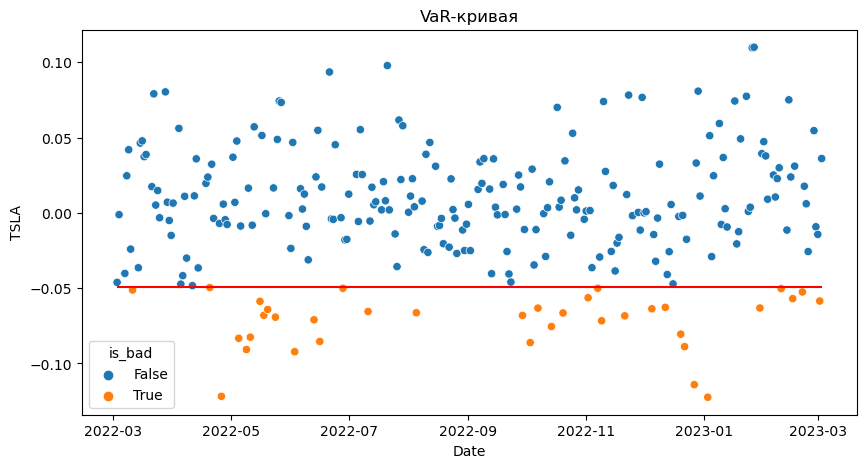

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

А почему все это плохо? А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

In [31]:
# your code here
# ʕ•ᴥ•ʔ

Способ оценки $\text{VaR},$ который мы использовали, называется **историческим.** Кроме него есть довольно много других способов. Например:

- можно попробовать подогнать какое-то распределение под данные и взять его квантиль
- можно попробовать обучить модель машинного обучения предсказывать соотвествующий квантиль
- можно обучить какую-нибудь модель на временном ряде
- можно попробовать отдельно моделировать хвосты распределения

Часть способов более подробно можно [посмотреть в лекциях Ильи Езепова.](https://rpubs.com/iezepov) Они немного староваты, но хороши. 

__и) [бонусные 5 баллов]__

Разберитесь как работает какой-нибудь ещё метод оценки $\text{VaR}$ и реализуйте его. Сравните его работу с историческим методом на нескольких ценных бумагах из наших данных. Например, вы можете разобраться с [ОГРом](https://rpubs.com/iezepov/e502lec2) или [моделированием хвостов.](https://rpubs.com/iezepov/e502lec6) Весь код должен быть написан на питоне. Часть бонуса -- попытаться найти библиотеки для этого.

In [32]:
# your code here
# [✖‿✖]

  ---------

# Часть 2: чековая

За задание можно получить $50$ баллов. Мы будем работать с покупками и чеками. Смотреть за корреляциями в покупках довольно полезно.

> В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». 

>К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

- `id` - номер покупки (чека)
- `fielddate` - дата покупки
- `product` - что было куплено

In [33]:
df = pd.read_csv('data/groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


id   fielddate           product
0  1808  21-07-2015    tropical fruit
1  2552  05-01-2015        whole milk
2  2300  19-09-2015         pip fruit
3  1187  12-12-2015  other vegetables
4  3037  01-02-2015        whole milk

## 2.1 Разогреваемся

__а) [10 баллов]__ Сколько всего уникальных заказов было сделано?

In [34]:
df['id'].nunique()

3898

Какие товары покупались чаще всего? Найдите топ-10 самых популярных товаров и изобразите частоту их покупок на столбиковой диаграмме. 

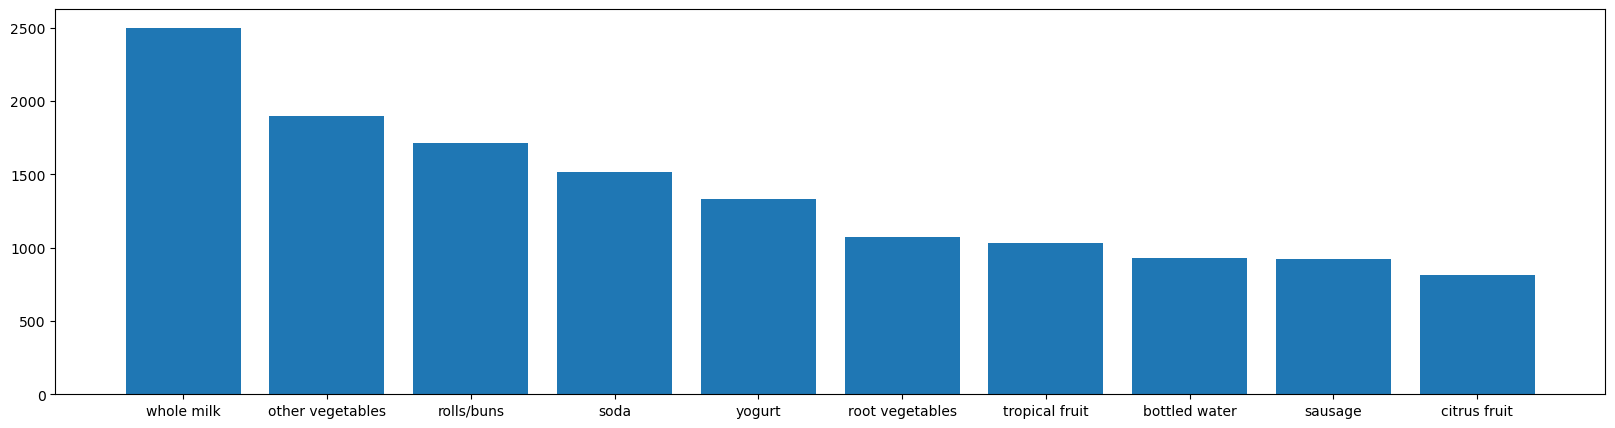

In [35]:
popular = df['product'].value_counts().head(10)
plt.figure(figsize=(20,5))
plt.bar(popular.keys(), popular.values)
plt.show()

Визуализируйте как часто покупались товары с помощью [облака слов.](https://www.python-graph-gallery.com/wordcloud/) Для графика используйте все товары из датасета. 

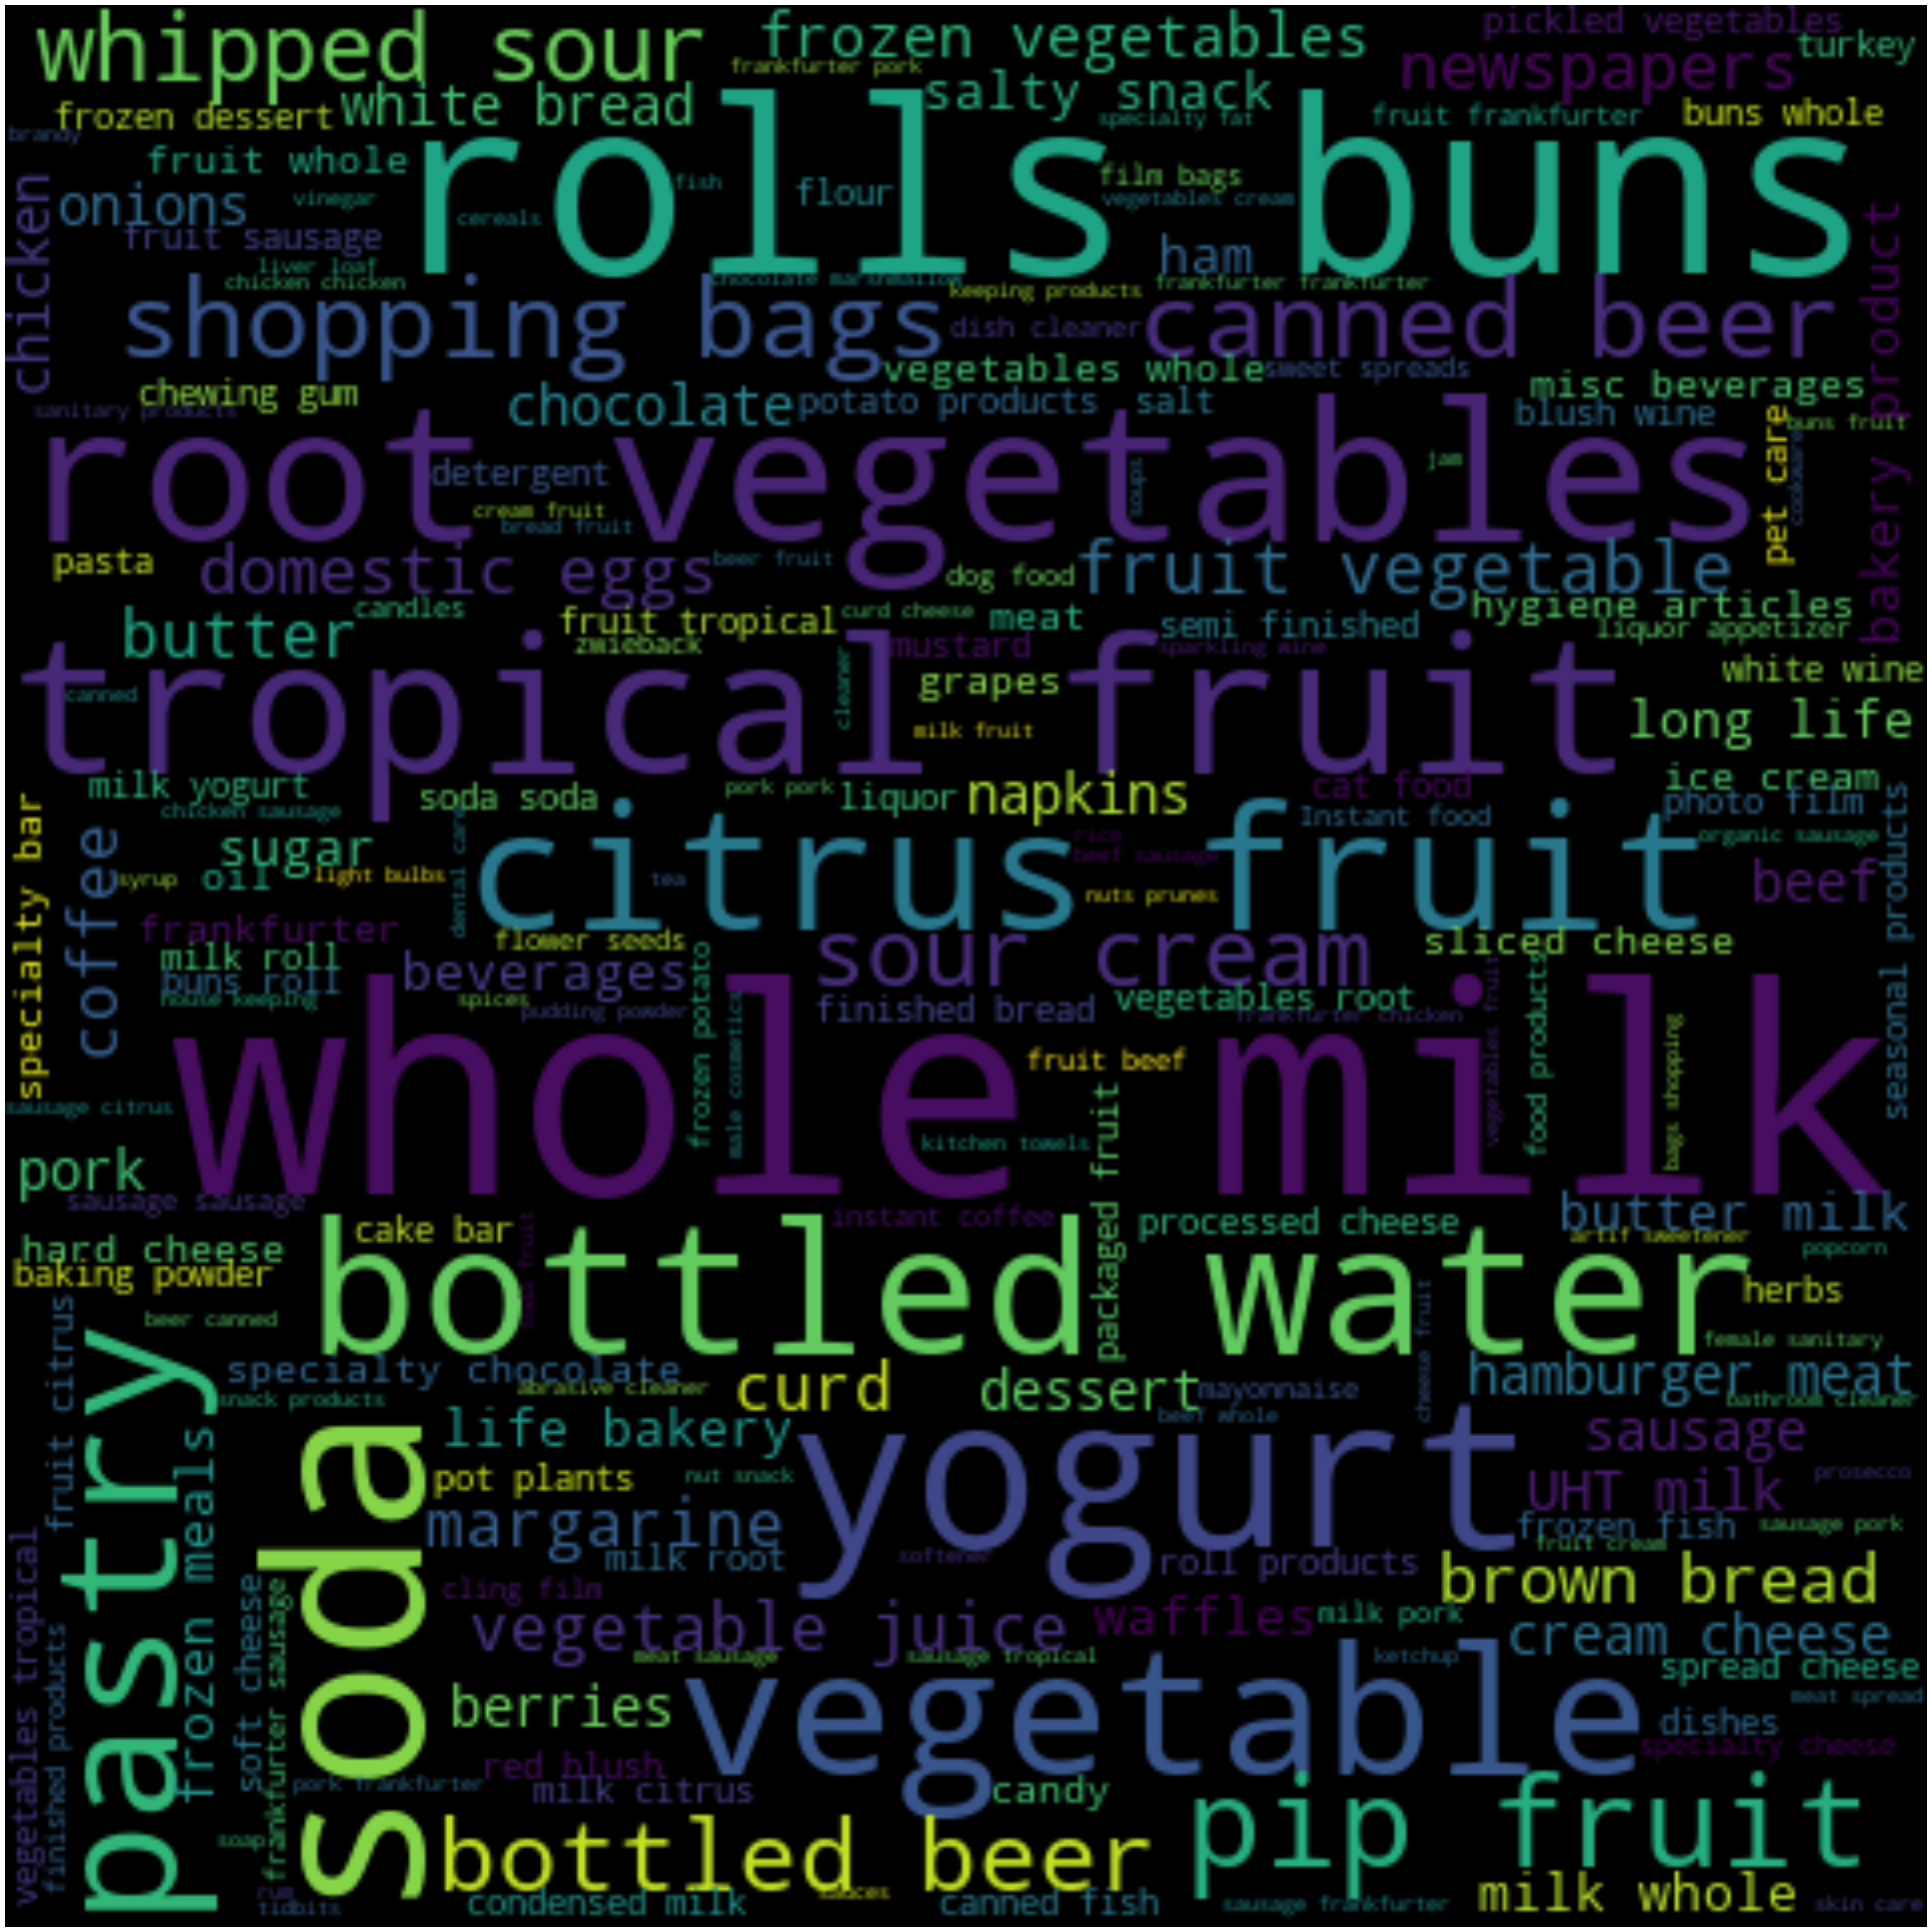

In [36]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text=' '.join(df['product'].to_list())
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

plt.figure(figsize=(50, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

__б) [10 баллов]__ Начнём анализировать совместные покупки товаров.

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет. 

По строкам отложите номера чеков. По столбцам отложите название продуктов. На пересечении должно стоять число товаров, купленное в этом чеке. Используйте для этого команду `pivot_table`.

В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в виде разреженных матриц.](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/) У нас данные небольшие, поэтому мы забьём на неоптимальность и продолжим работать с ними в `pandas`.

In [37]:
df_res = pd.pivot_table(df, index=['id'], columns=['product'], aggfunc={'product':'count'}, fill_value=0)
df_res.columns = df_res.columns.droplevel()
df_res

product  Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
id                                                                             
1000                         0         0                 0                 0   
1001                         0         0                 0                 0   
1002                         0         0                 0                 0   
1003                         0         0                 0                 0   
1004                         0         0                 0                 0   
...                        ...       ...               ...               ...   
4996                         0         0                 0                 0   
4997                         0         0                 0                 0   
4998                         0         0                 0                 0   
4999                         0         0                 0                 0   
5000                         0         0                 0                 0   

product  baby cosmetics  bags  baking powder  bathroom cleaner  beef  berries  \
id                                                                              
1000                  0     0              0                 0     0        0   
1001                  0     0              0                 0     1        0   
1002                  0     0              0                 0     0        0   
1003                  0     0              0                 0     0        0   
1004                  0     0              0                 0     0        0   
...                 ...   ...            ...               ...   ...      ...   
4996                  0     0              0                 0     0        0   
4997                  0     0              0                 0     0        0   
4998                  0     0              0                 0     0        0   
4999                  0     0              0                 0     0        2   
5000                  0     0              0                 0     0        0   

product  ...  turkey  vinegar  waffles  whipped/sour cream  whisky  \
id       ...                                                         
1000     ...       0        0        0                   0       0   
1001     ...       0        0        0                   1       0   
1002     ...       0        0        0                   0       0   
1003     ...       0        0        0                   0       0   
1004     ...       0        0        0                   0       0   
...      ...     ...      ...      ...                 ...     ...   
4996     ...       0        0        0                   0       0   
4997     ...       0        0        0                   0       0   
4998     ...       0        0        0                   0       0   
4999     ...       0        0        0                   1       0   
5000     ...       0        0        0                   0       0   

product  white bread  white wine  whole milk  yogurt  zwieback  
id                                                              
1000               0           0           2       1         0  
1001               1           0           2       0         0  
1002               0           0           1       0         0  
1003               0           0           0       0         0  
1004               0           0           3       0         0  
...              ...         ...         ...     ...       ...  
4996               0           0           0       0         0  
4997               0           1           1       0         0  
4998               0           0           0       0         0  
4999               0           0           0       1         0  
5000               0           0           0       0         0  

[3898 rows x 167 columns]

Постройте матрицу корреляций Пирсона. Визуализируйте матрицу с помошью heatmap.

In [38]:
df_corr = df_res.corr()
df_corr

product                Instant food products  UHT-milk  abrasive cleaner  \
product                                                                    
Instant food products               1.000000 -0.006936         -0.009420   
UHT-milk                           -0.006936  1.000000          0.013806   
abrasive cleaner                   -0.009420  0.013806          1.000000   
artif. sweetener                   -0.010825  0.006105         -0.006523   
baby cosmetics                     -0.003470 -0.007877         -0.002091   
...                                      ...       ...               ...   
white bread                         0.016640 -0.011550          0.010777   
white wine                          0.002853  0.009990          0.000107   
whole milk                          0.015981  0.028747          0.003558   
yogurt                              0.005071  0.006505          0.008360   
zwieback                            0.018221  0.028753         -0.009420   

product                artif. sweetener  baby cosmetics      bags  \
product                                                             
Instant food products         -0.010825       -0.003470 -0.004007   
UHT-milk                       0.006105       -0.007877  0.018349   
abrasive cleaner              -0.006523       -0.002091 -0.002415   
artif. sweetener               1.000000        0.105251 -0.002775   
baby cosmetics                 0.105251        1.000000 -0.000889   
...                                 ...             ...       ...   
white bread                   -0.006806       -0.008476 -0.009789   
white wine                    -0.018394       -0.005896 -0.006809   
whole milk                     0.029591       -0.021056 -0.024316   
yogurt                        -0.024397       -0.000410  0.034985   
zwieback                      -0.010825       -0.003470 -0.004007   

product                baking powder  bathroom cleaner      beef   berries  \
product                                                                      
Instant food products      -0.010419         -0.008275  0.005847 -0.014528   
UHT-milk                    0.009462         -0.018785  0.002897  0.020801   
abrasive cleaner           -0.013429         -0.004986  0.018970  0.001813   
artif. sweetener           -0.015432         -0.005730 -0.006645  0.016042   
baby cosmetics             -0.004947         -0.001837  0.014798 -0.007983   
...                              ...               ...       ...       ...   
white bread                -0.011195          0.005394  0.015850  0.030758   
white wine                 -0.010370          0.022577  0.015060  0.021670   
whole milk                  0.020192          0.032618  0.073856  0.028186   
yogurt                      0.041819         -0.011744  0.050165  0.023489   
zwieback                    0.037053          0.054973 -0.005211  0.021197   

product                ...    turkey   vinegar   waffles  whipped/sour cream  \
product                ...                                                     
Instant food products  ...  0.025355  0.021851  0.005348            0.014025   
UHT-milk               ... -0.003803 -0.024466  0.009144            0.006618   
abrasive cleaner       ...  0.012922 -0.008507 -0.007390            0.002163   
artif. sweetener       ...  0.049392 -0.009776  0.010179           -0.006614   
baby cosmetics         ... -0.003919 -0.003134 -0.007413           -0.011288   
...                    ...       ...       ...       ...                 ...   
white bread            ...  0.014921  0.001920 -0.000010            0.069757   
white wine             ... -0.005083  0.028101  0.015072            0.000317   
whole milk             ...  0.013874 -0.007158  0.069096            0.060338   
yogurt                 ...  0.013537 -0.020038  0.036691            0.030023   
zwieback               ... -0.003317 -0.014118  0.013097           -0.020911   

product                  whisky  white bread  white wine 

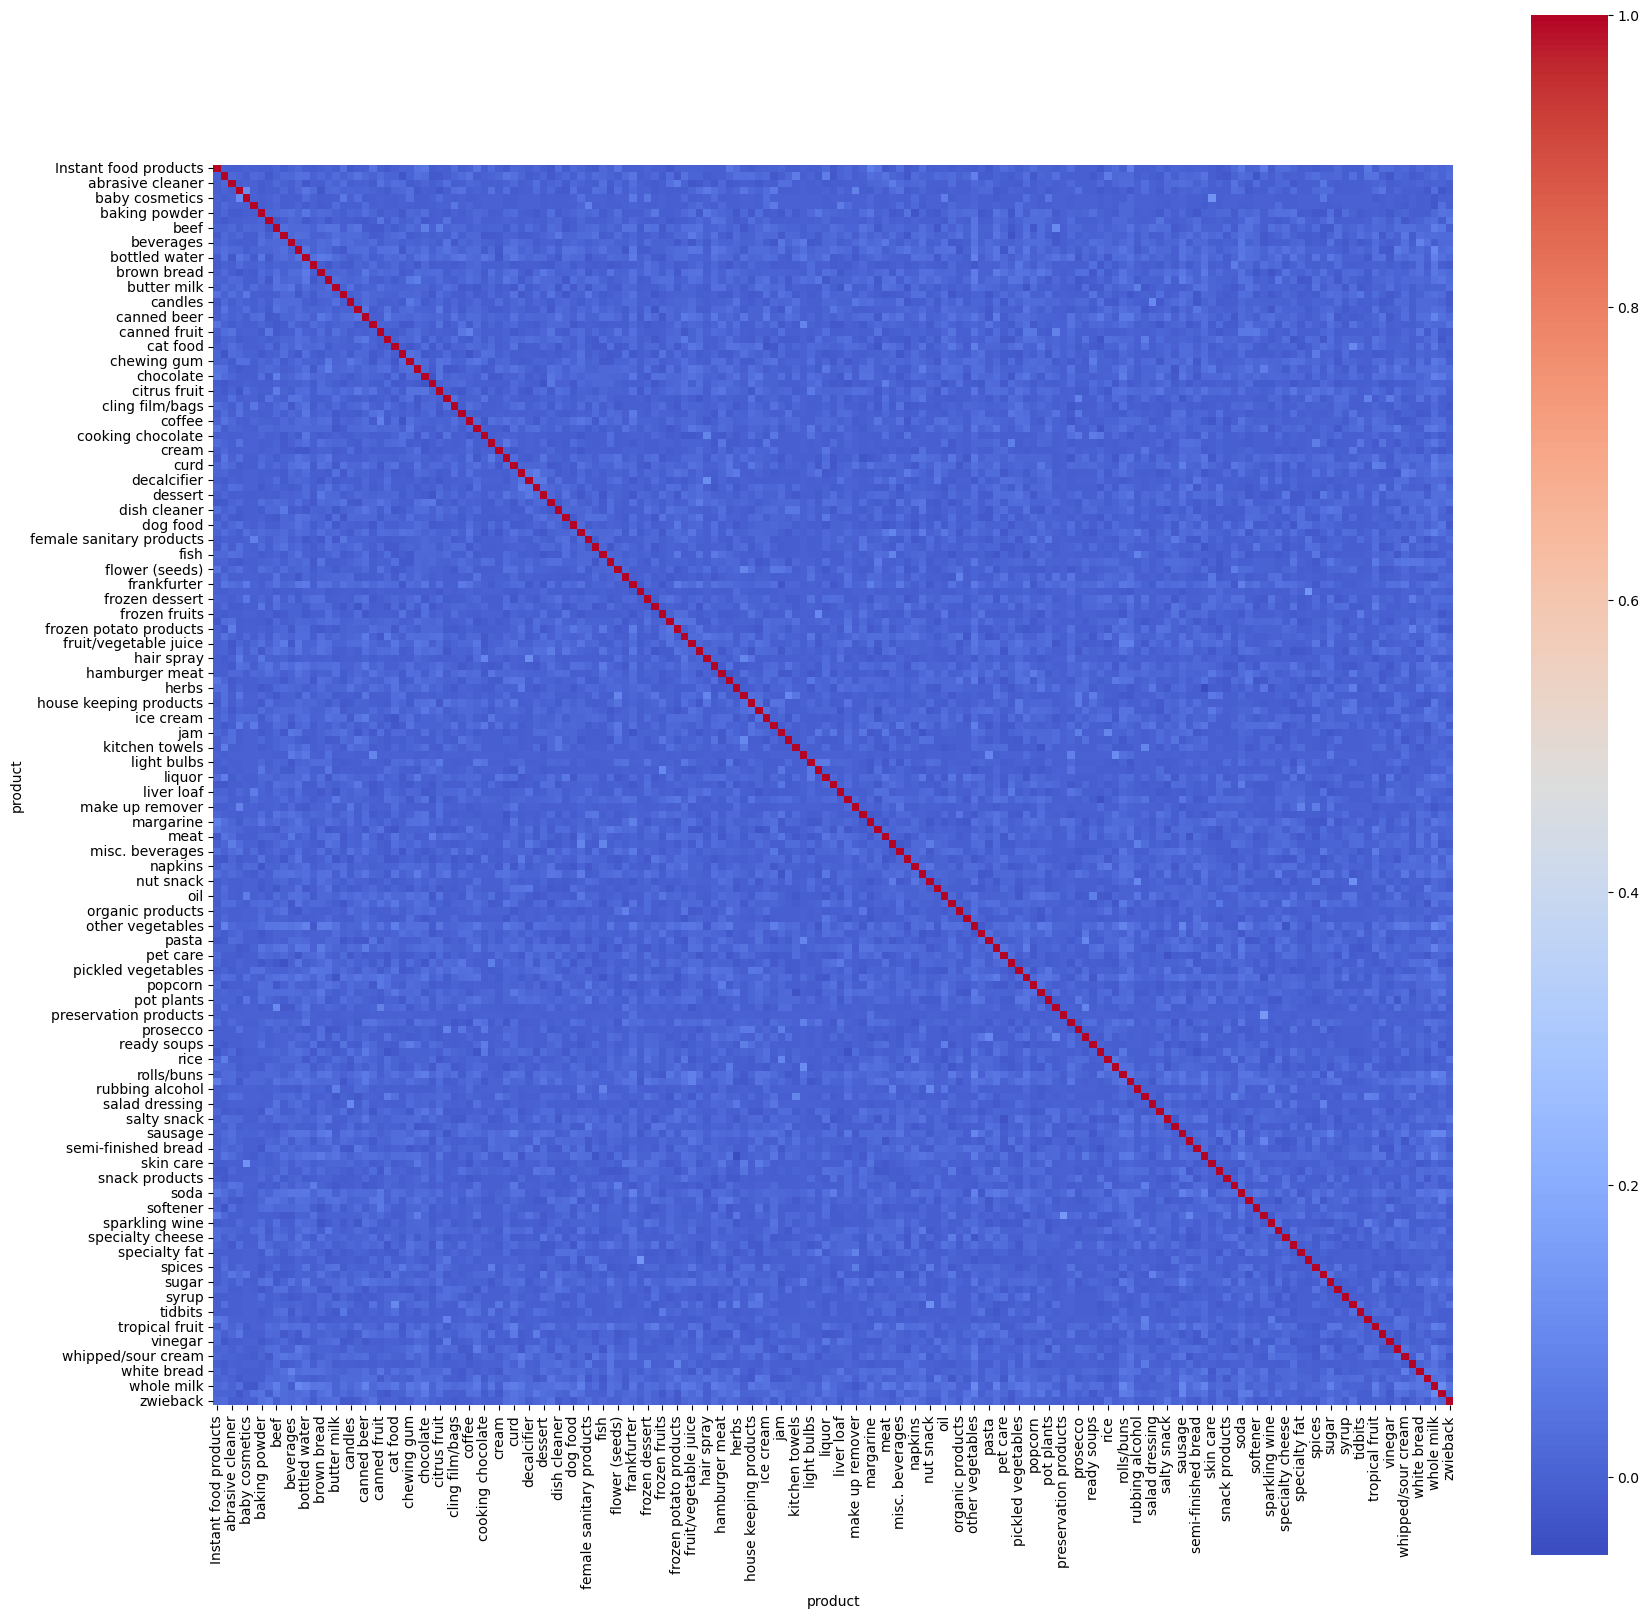

In [39]:
plt.figure(figsize=(20,20))
plt.xlable = 'Producte'
# df_corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(df_corr, square=True, cmap= 'coolwarm')
plt.show()

Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)? Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой? 

In [40]:
print(f'10 самых популярных товаров вместе с яйцами')
print('\n'.join(df_corr['domestic eggs'].sort_values(ascending=False)[1:].head(10).keys()))
print('\n10 самых не популярных товаров вместе с яйцами')
print('\n'.join(df_corr['domestic eggs'].sort_values()[1:].head(10).keys()))

10 самых популярных товаров вместе с яйцами
meat spreads
whole milk
newspapers
rubbing alcohol
meat
oil
coffee
fruit/vegetable juice
white wine
specialty bar

10 самых не популярных товаров вместе с яйцами
cooking chocolate
ready soups
dessert
cream
soft cheese
specialty vegetables
frozen fruits
ketchup
organic products
spices


Какие два продукта коррелируют сильнее всего? 

In [41]:
df_need = df_corr.replace(1,0)
df_max_corr = df_need.max().sort_values(ascending=False).head(2).keys()
print(f'{df_max_corr[0]} и {df_max_corr[1]} коррелируются сильнее всего')

preservation products и soups коррелируются сильнее всего


__Вопрос:__ почему корреляция пирсона это плохой способ измерить взаимосвязть между покупками?

__Ответ:__ Вероятнее всего потому что корреляция Пирсона определяет только линейную связь между признаками. Между человеческими покупками нет линейной связи, поэтому корреляция Пирсона выдает несколько нелогичные результаты.


## 2.2 Коэффициент корреляции Мэтьюса

__Коэффициент корреляции Мэтьюса__ — это мера силы взаимосвязи между двумя бинарными переменными. Для того чтобы его вычислить, необходимо использовать таблицу сопряженности

|        |  $0$   |  $1$   |
|:------:|:------:|:------:|
| $0$    |  $a$   |  $b$   |
| $1$    |  $c$   |  $d$   |

В строках таблицы сопряжённости находятся значения одного признака, по столбцам — второго, в каждой ячейке — количество объектов, на которых реализовалась эта пара. Коэффициент корреляции Мэтьюса вычисляется по данным из таблицы сопряжённости следующим образом:

$$
MCC(X_1, X_2) = \frac{a \cdot d - b \cdot c}{\sqrt{(a + b) \cdot (a + c) \cdot (b + d) \cdot (c + d)}}
$$

Точно так же, как и коэффициенты Пирсона и Спирмена, корреляция Мэтьюса лежит в диапазоне от $−1$ до $1.$ Нулевое значение соответсвуте отсутствию взаимосвязи между переменными. Значение $MCC(X_1, X_2) = 1$ соотвествует случаю, когда $X_1$ и $X_2$ полностью совпадают, то есть $b = c = 0$. Значение  $MCC(X_1, X_2) = -1$ соответствует случаю, когда каждое значение $X_1$ отличается от каждого значения $X_2$. 

Для категориальных переменных можно также считать коэффициент V-Крамера. Подробнее можно почитать про разные корреляции [в этом конспекте.](https://disk.yandex.ru/i/Znahvyg3mIrW9A)

__в) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары коэффициент корреляции Мэтьюса. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, matthews_corrcoef`. 
5. Отсортируйте получившиеся пары по коэффициенту Мэтьюса от 1 к -1 и сохраните первые сто строк получившейся таблички в файл `result_matthews.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [42]:
from sklearn.metrics import matthews_corrcoef
import itertools


# a = list(range(2, df_res.max().max()+1))
# df_met = df_res.replace(a,1)\

df_met = df_res.where(df_res<1, 1)
name_to_del = df_met.sum() < 10
name_to_del = name_to_del[name_to_del == True].keys()
df_met = df_met.drop(columns=name_to_del)
df_met

all_combination = list(itertools.combinations(df_met.columns.to_list(), 2))
result_mat = pd.DataFrame(columns=['product_1', 'product_2', 'matthews_corrcoef'])

for i, j in all_combination:
    mat_cor = matthews_corrcoef(df_met[i], df_met[j])
    result_mat.loc[ len(result_mat.index )] = [i, j, mat_cor]
    
result_mat

product_1         product_2  matthews_corrcoef
0      Instant food products          UHT-milk          -0.005502
1      Instant food products  abrasive cleaner          -0.009420
2      Instant food products  artif. sweetener          -0.010825
3      Instant food products     baking powder          -0.010363
4      Instant food products  bathroom cleaner          -0.008275
...                      ...               ...                ...
11776             white wine            yogurt           0.042513
11777             white wine          zwieback          -0.006570
11778             whole milk            yogurt           0.093302
11779             whole milk          zwieback           0.035588
11780                 yogurt          zwieback           0.023234

[11781 rows x 3 columns]

In [43]:
result_mat = result_mat.sort_values(by='matthews_corrcoef', ascending=False)
result_mat2 = result_mat.head(100)
result_mat2.to_csv('result_matthews.csv', index=False)

Отправьте свой файл `result_mat.csv` в контест (https://contest.yandex.ru/contest/47242/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

Дарья Берлизова, ID: 84900757, URL: https://contest.yandex.ru/contest/47242/run-report/84900757/

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

## 2.3 Независимость событий

 Конечно же, корреляция — это [не единственный способ искать](https://habr.com/ru/company/ods/blog/353502/) между покупками ассоциативные правила. Давайе попробуем другой подход.

Мы знаем, что события $A$ и $B$ называются независимыми, если $P(AB) = P(A)\cdot P(B)$. Отталкиваясь от этого определения, можно ввести другую характеристику, которая показывает, насколько продукты зависят друг от друга, а именно __поддержку (lift).__ 

$$
lift = \frac{P(AB)}{P(A)\cdot P(B)}
$$

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара $A$ не зависит от покупки товара $B$. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, $P(AB)$ высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности. 

__г) [5 баллов]__ Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`).

> Вам аккуратно нужно сделать три среза по условию  `>= 1`. Там, где пара надо делать срез так, чтобы оба товара дали `True`. Сделать это в одну строку вам поможет метод `.all(axis=1)`. Частоты можно получить методом `.mean()`, так как python думает, что `False` - это ноль, а `True` - это единица.

In [44]:
a = df_met['whole milk'].mean()
b = df_met['domestic eggs'].mean()
c = df_met[['whole milk','domestic eggs']].all(axis=1).mean()
print(c/a*b)
# df_met

0.020426531652318905


__д) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары значение поддержки, `lift`. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, lift`. 
5. Отсортируйте получившиеся пары по значению lift от больших к меньшим и сохраните первые сто строк получившейся таблички в файл `result_lift.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [45]:
all_combination = list(itertools.combinations(df_met.columns.to_list(), 2))
result_lift = pd.DataFrame(columns=['product_1', 'product_2', 'lift'])

for i, j in all_combination:
    a = df_met[i].mean()
    b = df_met[j].mean()
    c = df_met[[i,j]].all(axis=1).mean()
    lift = c/(a*b)
    result_lift.loc[ len(result_lift.index )] = [i, j, lift]
    
result_lift

product_1         product_2      lift
0      Instant food products          UHT-milk  0.849237
1      Instant food products  abrasive cleaner  0.000000
2      Instant food products  artif. sweetener  0.000000
3      Instant food products     baking powder  0.536915
4      Instant food products  bathroom cleaner  0.000000
...                      ...               ...       ...
11776             white wine            yogurt  1.314976
11777             white wine          zwieback  0.755426
11778             whole milk            yogurt  1.161510
11779             whole milk          zwieback  1.309518
11780                 yogurt          zwieback  1.295799

[11781 rows x 3 columns]

In [46]:
result_lift = result_lift.sort_values(by='lift', ascending=False)
result_lift2 = result_lift.head(100)
result_lift2.to_csv('result_lift.csv', index=False)

Отправьте свой файл `result_lift.csv` в контест (https://contest.yandex.ru/contest/47242/problems/C/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

Берлизова Дарья, ID: 84974861, URL: https://contest.yandex.ru/contest/47242/run-report/84974861/

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__е) [5 баллов]__ Давайте проинтепретируем результаты.

- Посмотрите на 10 пар продуктов с самой высокой корреляцией Мэтьюса и на 10 пар с самой низкой. Проинтерпретируйте, насколько эта корреляция логична? Придумайте ситуации, когда какие-то из пар могли бы покупаться вместе.
- Посмотрите на 10 пар продкутов с самым высоким lift, насколько логично они выделились? 
- Насколько большим оказалось пересечение двух методов? Как думаете, почему? А если взять первые сто пар?

__Ответы:__ Честно говоря, для меня никакая из этих корреляций нелогична. Все похоже на наборы с товарами, которые просит беременная женщина из плохих шуток в 3 утра... Единственные штуки, которые кажутся мне адекватными парами - молоко и йогурт, орехи и чай, остальное и среди пар с высокой корреляцией, и среди пар с низкой, выглядит как рецепт для облегчения кишечника ;( Но вообще вот если вы одинокий человек и у вас есть кот, можете попить с ним чай, пока он кушает...

По поводу продуктов с высоким lift будто бы появляется какая-то логика. Ну например если вы выращиваете цветы и вам нужен для них грунт, значит вы вероятнее всего живете в около сельской местности и дружите с природой, поэтому покупаете органические продукты. Ореховые снеки и чай тоже выглядят логичной парой. По остальным наборам у меня нет комментариев, я не понимаю, почему они в таком виде появляются в чьих-то покупках...

Есть несколько пересечений меду самой высокой корреляцией Мэтьюса и самым высоким lift, а именно nut snacks/tea, honey/ketchup, canned fruit/potato products. Вероятно это произошло из-за того, что там действительно существует и вероятностная связь, и связь по простому попадению 2 продуктов в чек одновременно. 

In [47]:
result_mat2.head(10)

product_1        product_2  matthews_corrcoef
9689        nut snack              tea           0.117578
6542   flower (seeds)            honey           0.095058
11218         sausage           yogurt           0.094040
7958            honey          ketchup           0.093365
11778      whole milk           yogurt           0.093302
8582   kitchen towels              rum           0.089588
8417              jam             rice           0.088470
2954     canned fruit  potato products           0.088020
3254         cat food              tea           0.087834
6354             fish     meat spreads           0.086703

In [48]:
result_mat.sort_values(by='matthews_corrcoef').head(10)

product_1            product_2  matthews_corrcoef
7921                      herbs        shopping bags          -0.052079
8962   long life bakery product       red/blush wine          -0.037910
1141                    berries           photo/film          -0.034996
8570             kitchen towels                 pork          -0.034400
10259                  pet care          salty snack          -0.033813
9227                       meat              mustard          -0.033340
8138           hygiene articles           mayonnaise          -0.032691
10845            red/blush wine  semi-finished bread          -0.032391
8725                     liquor            pip fruit          -0.032196
10431                 pip fruit                soups          -0.032088

In [49]:
result_lift2.head(10)

product_1         product_2       lift
6669  flower soil/fertilizer  organic products  24.362500
7995                   honey       ready soups  19.989744
9689               nut snack               tea  19.686869
7958                   honey           ketchup  18.740385
4715       cooking chocolate       ready soups  17.324444
2954            canned fruit   potato products  16.874459
7114           frozen fruits           tidbits  16.107438
7993                   honey          prosecco  15.781377
8009                   honey         skin care  14.992308
4713       cooking chocolate          prosecco  13.677193

In [50]:
result_lift.sort_values(by='lift').head(10)

product_1        product_2  lift
3882  chocolate marshmallow            soups   0.0
4926                  cream          mustard   0.0
404        abrasive cleaner          popcorn   0.0
4927                  cream          napkins   0.0
407        abrasive cleaner  potato products   0.0
3406            chewing gum         cookware   0.0
409        abrasive cleaner         prosecco   0.0
418        abrasive cleaner             salt   0.0
4929                  cream        nut snack   0.0
4887                  cream    domestic eggs   0.0

__ё) [бонусные 5 баллов]__ 

Иногда в чеках пытаются искать __продукты-якоря.__ То есть продукты, которые являются основными. Например: айфон - основной продукт, наушники и чехол - дополнения к нему. Предложите алгоритм поиска таких товаров, похожий на то, что мы делали выше. Реализуйте алгоритм поиска якорей, который вы придумали. 

__Ответ:__ ваш текст


In [51]:
# your code here
# [̲̅$̲̅(̲̅5̲̅)̲̅$̲̅]